# Identifying  KNIME RDKit descriptors

In [2]:
# In order to match descriptors directly computed from RDKit and from KNIME we are going to compare results from both procedures using two molecules

In [88]:
import pandas as pd
import numpy as np

In [89]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

In [90]:
# Read the molecules to use rdkit
SDF_MIN_DIR = '../../ARCHIVOS/CRISTALES/LIGS_ERK2/FOURCHES_LIGS/3d_minimized/sdf/'

# Read the molecules using rdkit
csar_1 = Chem.SDMolSupplier(SDF_MIN_DIR + 'CSAR_erk2_1.sdf')[0]
csar_10 = Chem.SDMolSupplier(SDF_MIN_DIR + 'CSAR_erk2_10.sdf')[0]
model_53 = Chem.SDMolSupplier(SDF_MIN_DIR + 'erk2_53.sdf')[0]

<div style='background-color: #F9E5AB; padding: 1px 2px 5px 10px; font-size: 1em;'>
    <h1 class='text-danger'>0) MACCS Keys Descriptors</h1>
</div>

In [93]:
import pickle
file_ = './main_table_of_Fourches_ligs_ERK2.pkl'
with open(file_, 'rb') as f:
    df_erk2_mols = pickle.load(f)
df_erk2_mols = df_erk2_mols.set_index('Name')

#### RDKit

In [112]:
## Get rdkit descriptors
#  Let's extract the MACCS Keys as a Data frame
s = df_erk2_mols.maccs.map(lambda x: list(map(np.int, x)))
df_maccs_all = pd.DataFrame.from_dict(dict(zip(s.index, s.values))).T
# We have to clarify that MACCS Keys from rdkit includes a dummy key at the begining due to the 0 indexing
# Let's drop it
df_maccs_all = df_maccs_all.drop([0], axis=1)
df_maccs_all.head()

,1,2,3,4,5,6,7,8,9,10,...,157,158,159,160,161,162,163,164,165,166
CSAR_erk2_18,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
CSAR_erk2_20,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
CSAR_erk2_17,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
CSAR_erk2_16,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
CSAR_erk2_15,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


#### KNIME

In [147]:
df_macc_knime = pd.read_csv('./knime/maccs_fourches_ligs.csv', index_col=0)
df_macc_knime = df_macc_knime.applymap(np.int)
# Drop bit vector
assert df_macc_knime.bitvector0.sum() == 0
df_macc_knime = df_macc_knime.drop(['bitvector0'], axis=1)
# Rename columns and indices
df_macc_knime.columns = df_maccs_all.columns
df_macc_knime.index = df_macc_knime.index.str.strip('.sdf')
# Reindex to match the same order used by fourches
df_macc_knime = df_macc_knime.reindex(df_maccs_all.index.values)
df_macc_knime.head()

,1,2,3,4,5,6,7,8,9,10,...,157,158,159,160,161,162,163,164,165,166
Filename,,,,,,,,,,,,,,,,,,,,,
CSAR_erk2_18,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
CSAR_erk2_20,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
CSAR_erk2_17,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
CSAR_erk2_16,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
CSAR_erk2_15,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


### Compare two sets of MACCS Keys

In [150]:
(df_maccs_all == df_macc_knime).all().all()

True

<div style='background-color: #F9E5AB; padding: 1px 2px 5px 10px; font-size: 1em;'>
    <h1 class='text-danger'>1) RDKit 2D Descriptors</h1>
</div>

**1. KNIME RDKit Descriptor Calculation node return 119 properties instead the 117 that Ash & Fourches indicate.**

The source code of the KNIME Node is [here](https://github.com/rdkit/knime-rdkit/blob/2616f9fa3c56107825ae26f3435a7733b1658251/org.rdkit.knime.nodes/src/org/rdkit/knime/nodes/descriptorcalculation/Descriptor.java).

In [6]:
rdk2d_knime = pd.read_csv('knime/2d_rdki_knime.csv')
rdk2d_knime['Filename'] = rdk2d_knime['Filename'].apply(lambda x: x.lower().split('.')[0])
rdk2d_knime = rdk2d_knime.set_index('Filename')
rdk2d_knime = rdk2d_knime.iloc[:, 6:]

print(rdk2d_knime.shape)
rdk2d_knime.columns.values

(86, 118)


array(['SMR', 'LabuteASA', 'TPSA', 'AMW', 'ExactMW', 'NumLipinskiHBA',
       'NumLipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA',
       'NumAmideBonds', 'NumHeteroAtoms', 'NumHeavyAtoms', 'NumAtoms',
       'NumStereocenters', 'NumUnspecifiedStereocenters', 'NumRings',
       'NumAromaticRings', 'NumSaturatedRings', 'NumAliphaticRings',
       'NumAromaticHeterocycles', 'NumSaturatedHeterocycles',
       'NumAliphaticHeterocycles', 'NumAromaticCarbocycles',
       'NumSaturatedCarbocycles', 'NumAliphaticCarbocycles',
       'FractionCSP3', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v',
       'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n', 'HallKierAlpha', 'kappa1',
       'kappa2', 'kappa3', 'slogp_VSA1', 'slogp_VSA2', 'slogp_VSA3',
       'slogp_VSA4', 'slogp_VSA5', 'slogp_VSA6', 'slogp_VSA7',
       'slogp_VSA8', 'slogp_VSA9', 'slogp_VSA10', 'slogp_VSA11',
       'slogp_VSA12', 'smr_VSA1', 'smr_VSA2', 'smr_VSA3', 'smr_VSA4',
       'smr_VSA5', 'smr_VSA6', 'smr_VSA7', 'smr_VSA8', 'smr_VSA9

2. RDKit has a list of the main descriptors included in the 'Descriptors' Module; but not all are the same as those reported by KNIME.

In [17]:
len(rdMolDescriptors.MQNs_(csar_1))

42

In [61]:
from rdkit.Chem import Descriptors
names_of_all_rdkit_descriptors = [x[0] for x in Descriptors._descList if x[0][:3] != 'fr_']
# Number of descriptor available:
np.array(names_of_all_rdkit_descriptors)

array(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt',
       'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons',
       'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2',
       'FpDensityMorgan3', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n',
       'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n',
       'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1',
       'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10',
       'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
       'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6',
       'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10',
       'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6',
       'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10',
       'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 

3. Which descriptors do RDKit and KNIME have in common?

In [8]:
knime_ = [i.lower() for i in rdk2d_knime.columns.values]
rdkit_= [i.lower() for i in names_of_all_rdkit_descriptors]
descriptors_in_common = np.array(list(set(rdkit_) & set(knime_)))
print('KNIME and RDKIT have AT LEAST', len(descriptors_in_common), 'descriptors in common.')
descriptors_in_common

KNIME and RDKIT have AT LEAST 63 descriptors in common.


array(['peoe_vsa5', 'slogp_vsa6', 'chi0v', 'slogp_vsa11', 'slogp_vsa9',
       'kappa3', 'smr_vsa10', 'slogp_vsa7', 'slogp_vsa4', 'chi1v',
       'fractioncsp3', 'peoe_vsa6', 'peoe_vsa14', 'hallkieralpha',
       'numaromaticheterocycles', 'numsaturatedheterocycles', 'smr_vsa9',
       'peoe_vsa3', 'labuteasa', 'smr_vsa3', 'kappa1', 'slogp_vsa5',
       'chi3v', 'kappa2', 'peoe_vsa12', 'slogp_vsa1', 'chi1n',
       'peoe_vsa10', 'chi2v', 'smr_vsa2', 'chi4v', 'peoe_vsa8',
       'numaliphaticcarbocycles', 'chi4n', 'smr_vsa5', 'chi2n',
       'smr_vsa4', 'peoe_vsa2', 'peoe_vsa7', 'slogp_vsa12',
       'numrotatablebonds', 'numheteroatoms', 'numaliphaticrings',
       'slogp_vsa2', 'smr_vsa6', 'peoe_vsa11', 'slogp_vsa8',
       'numsaturatedcarbocycles', 'peoe_vsa1', 'slogp_vsa3',
       'numsaturatedrings', 'tpsa', 'numaromaticcarbocycles',
       'slogp_vsa10', 'smr_vsa7', 'peoe_vsa4', 'smr_vsa8', 'peoe_vsa13',
       'numaliphaticheterocycles', 'smr_vsa1', 'numaromaticrings',
       'c

But, for the same descriptors, are the values from KNIME and rdkit the same?

In [9]:
# Let's compare the csar_1 ligand
rdk2d_KNIME_csar_1  = rdk2d_knime.loc['csar_erk2_1']

In [10]:
# Compute 2d descriptors using rdkit
from rdkit.ML.Descriptors import MoleculeDescriptors
# rdkit descriptor calculator
rdk_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(names_of_all_rdkit_descriptors)

# Compute the descriptors for the csar_1 molecule
rdk2d_RDKIT_csar_1 = pd.Series(dict(zip(names_of_all_rdkit_descriptors, rdk_calculator.CalcDescriptors(mol = csar_1))))

### Some examples:

#### Molecular weight

In [11]:
rdk2d_KNIME_csar_1.ExactMW

310.142975816

In [12]:
rdk2d_RDKIT_csar_1.ExactMolWt

310.142975816

#### slogp_VSA4

In [13]:
rdk2d_KNIME_csar_1.slogp_VSA4

6.923737199690624

In [14]:
rdk2d_RDKIT_csar_1.SlogP_VSA4

6.923737199690624

### List the RDKit Descriptors used in KNIME 

In [24]:
knime_ = [i.lower() for i in rdk2d_knime.columns.values]
rdkit_= [i.lower() for i in names_of_all_rdkit_descriptors]

unique_knime = [i for i in knime_ if i not in rdkit_]
np.array(unique_knime)

array(['smr', 'amw', 'exactmw', 'numlipinskihba', 'numlipinskihbd',
       'numhbd', 'numhba', 'numamidebonds', 'numheavyatoms', 'numatoms',
       'numstereocenters', 'numunspecifiedstereocenters', 'numrings',
       'mqn1', 'mqn2', 'mqn3', 'mqn4', 'mqn5', 'mqn6', 'mqn7', 'mqn8',
       'mqn9', 'mqn10', 'mqn11', 'mqn12', 'mqn13', 'mqn14', 'mqn15',
       'mqn16', 'mqn17', 'mqn18', 'mqn19', 'mqn20', 'mqn21', 'mqn22',
       'mqn23', 'mqn24', 'mqn25', 'mqn26', 'mqn27', 'mqn28', 'mqn29',
       'mqn30', 'mqn31', 'mqn32', 'mqn33', 'mqn34', 'mqn35', 'mqn36',
       'mqn37', 'mqn38', 'mqn39', 'mqn40', 'mqn41', 'mqn42'], dtype='<U27')

In [33]:
import math

In [ ]:
# Thus, we are going to include these descriptors in our RDKit evaluation


In [25]:
# Exact Molecualr weight
rdk2d_KNIME_csar_1.ExactMW == rdk2d_RDKIT_csar_1.ExactMolWt

True

In [35]:
# Molecular weight
math.isclose(rdk2d_KNIME_csar_1.AMW, rdk2d_RDKIT_csar_1.MolWt)

True

In [37]:
# Number of HBD
rdk2d_KNIME_csar_1.NumLipinskiHBD == rdk2d_RDKIT_csar_1.NumHDonors

True

In [38]:
# Number of Num heavy atoms, num atoms, num hetero atoms
print(rdk2d_KNIME_csar_1.NumHeavyAtoms == rdk2d_RDKIT_csar_1.HeavyAtomCount)
print(rdk2d_KNIME_csar_1.NumHeteroAtoms == rdk2d_RDKIT_csar_1.NumHeteroatoms)


True

#### Missing descriptors not considered by the RDKit initial list
- smr
- numAtoms
- numstereocenters
- numunspecifiedstereocenters
- mqn

#### But they can be calculated using the following descriptors:
- CalcNumAtomStereoCenters
- CalcNumUnspecifiedAtomStereoCenters
- GetNumAtoms
- MQNs

In [58]:
rdk2d_KNIME_csar_1.smr_VSA5

26.813052428219837

In [85]:
from rdkit.Chem import Descriptors
names_of_all_rdkit_descriptors = [x[0] for x in Descriptors._descList if x[0][:3] != 'fr_']
# Number of descriptor available:
names_of_all_rdkit_descriptors = names_of_all_rdkit_descriptors + ['MQNs']

from rdkit.ML.Descriptors import MoleculeDescriptors
# rdkit descriptor calculator
rdk_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(names_of_all_rdkit_descriptors)

# Compute the descriptors for the csar_1 molecule
rdk2d_RDKIT_csar_1 = pd.Series(dict(zip(names_of_all_rdkit_descriptors, rdk_calculator.CalcDescriptors(mol = csar_1))))

rdk2d_RDKIT_csar_1

MaxEStateIndex        12.028149
MinEStateIndex        -0.262391
MaxAbsEStateIndex     12.028149
MinAbsEStateIndex      0.048479
qed                    0.803526
                        ...    
NumSaturatedRings      0.000000
RingCount              3.000000
MolLogP                3.479620
MolMR                 86.962700
MQNs                 777.000000
Length: 116, dtype: float64

### Are these descriptors constant regardless the 3D conformation?

In [176]:
# MQN Descriptors go from 1 to 42
names_MQN = ['MQN' + str(i) for i in range(1, 43)]

# Final Lsit of descirptors
names_all_rdkit_descriptors = names_of_all_rdkit_descriptors + ['CalcNumAtomStereoCenters',
                                                            'CalcNumUnspecifiedAtomStereoCenters',
                                                            'GetNumAtoms'] + names_MQN

In [165]:
from rdkit.Chem import Draw

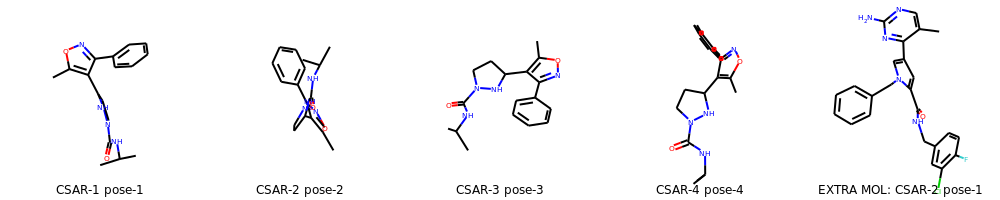

In [210]:
mol_name = 'CSAR_erk2_1'

# Docking conformations
SDF_DOCKED_DIR = f'../../ARCHIVOS/CRISTALES/LIGS_ERK2/FOURCHES_LIGS/3d_minimized/docking_results_CRYS_ENS/VINARDO_POSES/SDF/'
# Docking pose conformation #1
csar_1_dk1 = Chem.SDMolSupplier(SDF_DOCKED_DIR + mol_name+ '/' + mol_name + '_1erk_dkVin.sdf')[0]
# Docking pose conformation #2
csar_1_dk2 = Chem.SDMolSupplier(SDF_DOCKED_DIR + mol_name+ '/' + mol_name + '_3i60_dkVin.sdf')[0]
# Docking pose conformation #3
csar_1_dk3 = Chem.SDMolSupplier(SDF_DOCKED_DIR + mol_name+ '/' + mol_name + '_4xj0_dkVin.sdf')[0]
# Docking pose conformation #3
csar_1_dk4 = Chem.SDMolSupplier(SDF_DOCKED_DIR + mol_name+ '/' + mol_name + '_6g8x_dkVin.sdf')[0]

# Extenral molecule
csar_2_dk1 = Chem.SDMolSupplier(SDF_DOCKED_DIR +'CSAR_erk2_2' + '/' + 'CSAR_erk2_2' + '_3i60_dkVin.sdf')[0]

# visualize the poses
names_list = ['CSAR-1 pose-1', 'CSAR-2 pose-2', 'CSAR-3 pose-3', 'CSAR-4 pose-4', 'EXTRA MOL: CSAR-2 pose-1']
Draw.MolsToGridImage([csar_1_dk1, csar_1_dk2, csar_1_dk3, csar_1_dk4, csar_2_dk1], molsPerRow=5, legends = names_list)

In [181]:
def rdkit2d_calculator(mol):
    i = mol
    mol_2d_descriptors = [list(rdk_calculator.CalcDescriptors(mol = i)) +
            [rdMolDescriptors.CalcNumAtomStereoCenters( i )] +
            [rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters( i )] +
            [i.GetNumAtoms()] +
            rdMolDescriptors.MQNs_( i )]
    mol_2d_descriptor_series = pd.Series(dict(zip(names_all_rdkit_descriptors, mol_2d_descriptors[0])))
    return mol_2d_descriptor_series

In [211]:
dk1_desc = rdkit2d_calculator(csar_1_dk1)
dk2_desc = rdkit2d_calculator(csar_1_dk2)
dk3_desc = rdkit2d_calculator(csar_1_dk3)
dk4_desc = rdkit2d_calculator(csar_1_dk4)

extra_csar_2_dk1_desc = rdkit2d_calculator(csar_2_dk1)

In [215]:
# In the same molecule, all 161 molecules are the same 
(dk1_desc == dk2_desc).sum()

161

In [216]:
# In the same molecule, all 161 molecules are the same 
(dk2_desc == dk4_desc).sum()

161

In [214]:
# In the same molecule, all 161 molecules are the same 
(dk3_desc == dk2_desc).sum()

161

In [213]:
# In different molecules (csar_1 and csar_2) most descriptors are different
(extra_csar_2_dk1_desc== dk2_desc).sum()

41

<div style='background-color: #F9E5AB; padding: 1px 2px 5px 10px; font-size: 1em;'>
    <h1 class='text-danger'>2) WHIM Descriptors</h1>
</div>


[RDKit source code](https://github.com/rdkit/rdkit/blob/master/Code/GraphMol/Descriptors/WHIM.cpp)

In [14]:
# List of RDKit descriptors

whim_axial = [ "L1u", "L2u", "L3u", "P1u", "P2u", "G1u", "G2u", "G3u", "E1u", "E2u", "E3u", 
               "L1m", "L2m", "L3m", "P1m", "P2m", "G1m", "G2m", "G3m", "E1m", "E2m", "E3m", 
               "L1v", "L2v", "L3v", "P1v", "P2v", "G1v", "G2v", "G3v", "E1v", "E2v", "E3v", 
               "L1e", "L2e", "L3e", "P1e", "P2e", "G1e", "G2e", "G3e", "E1e", "E2e", "E3e", 
               "L1p", "L2p", "L3p", "P1p", "P2p", "G1p", "G2p", "G3p", "E1p", "E2p", "E3p", 
               "L1i", "L2i", "L3i", "P1i", "P2i", "G1i", "G2i", "G3i", "E1i", "E2i", "E3i", 
               "L1s", "L2s", "L3s", "P1s", "P2s", "G1s", "G2s", "G3s", "E1s", "E2s", "E3s"]
whim_global = ["Tu", "Tm", "Tv", "Te", "Tp", "Ti", "Ts", 
               "Au", "Am", "Av", "Ae", "Ap", "Ai", "As", 
               "Gu", "Gm", 
               "Ku", "Km", "Kv", "Ke", "Kp", "Ki", "Ks", 
               "Du", "Dm", "Dv", "De", "Dp", "Di", "Ds", 
               "Vu", "Vm", "Vv", "Ve", "Vp", "Vi", "Vs"]

rdkit_whim_names = whim_axial + whim_global

In [15]:
# Compute the Whim descriptors using rdkit
# 
df_rdk_whim = pd.DataFrame(rdMolDescriptors.CalcWHIM(csar_1), rdkit_whim_names, columns=['csar_1_RDK'])
df_rdk_whim['csar_10_RDK'] = rdMolDescriptors.CalcWHIM(csar_10)

# Merge both dataframes
df_rdk_whim.head(5)

,csar_1_RDK,csar_10_RDK
L1u,7.625,29.166
L2u,4.167,1.991
L3u,0.649,0.695
P1u,0.613,0.916
P2u,0.335,0.062


### Comparing KNIME Whim Descriptors against RDKit WHIM

In [16]:
# Load the results generated using KNIME and the node WHIM 3D
whim_knime_all = pd.read_csv('./knime/whim_rdki_knime.csv', index_col=0)
# Replace ? string by Nan values
whim_knime_all = whim_knime_all.replace('�', np.nan)
# whim_knime_all.iloc[:, 6:].dropna(how='all', axis=1)

#### WHIM KNIME has the following:
- **Weight schemes:**
    1. Unit Weights = unweighted (u)
    - Atomic Masses = m
    - Van der Waals volumes = v
    - Atomic electronegativites = e
    - Atomic polarizabilities = p

It doesn't have *Electropological state indices* and *Topological I-state*

**Descriptors:**
Note: The order here is inverse to the reported by rdkit, i.e., lambda1 = L3)
    
> - **Axial:**
    1. Lambda: 3, 2, 1 => **L**
    2. Nu: 2, 1        => **P**
    3. Gamma: 3, 2, 1  => **G**
    4. Eta: 3, 2, 1    => **E**
    
> - **Global:** Are the same as RDKit
    - T, A, V, K, G, D

In [17]:
# For comparation purposes we'll only keep one molecule
# Descriptors start from the eigth colum
whim_knime = whim_knime_all.iloc[[0, 1], 6:]
whim_knime.index = ['csar_1_KNM', 'csar_10_KNM']
# Name of the whim descriptors in Knime
whim_knime.columns

Index(['Unit Weights.Wlambda1', 'Unit Weights.Wlambda2',
       'Unit Weights.wlambda3', 'Unit Weights.Wnu1', 'Unit Weights.Wnu2',
       'Unit Weights.Wgamma1', 'Unit Weights.Wgamma2', 'Unit Weights.Wgamma3',
       'Unit Weights.Weta1', 'Unit Weights.Weta2', 'Unit Weights.Weta3',
       'Unit Weights.WT', 'Unit Weights.WA', 'Unit Weights.WV',
       'Unit Weights.WK', 'Unit Weights.WG', 'Unit Weights.WD',
       'Atomic Masses.Wlambda1', 'Atomic Masses.Wlambda2',
       'Atomic Masses.wlambda3', 'Atomic Masses.Wnu1', 'Atomic Masses.Wnu2',
       'Atomic Masses.Wgamma1', 'Atomic Masses.Wgamma2',
       'Atomic Masses.Wgamma3', 'Atomic Masses.Weta1', 'Atomic Masses.Weta2',
       'Atomic Masses.Weta3', 'Atomic Masses.WT', 'Atomic Masses.WA',
       'Atomic Masses.WV', 'Atomic Masses.WK', 'Atomic Masses.WG',
       'Atomic Masses.WD', 'Atomic Polarizabilities.Wlambda1',
       'Atomic Polarizabilities.Wlambda2', 'Atomic Polarizabilities.wlambda3',
       'Atomic Polarizabilities.Wnu1', 

Descriptors are sorted by the weighted schema and then by the property.

#### Let's rename KNIME descriptors to match the RDKit's names

In [18]:
# Let's convert the Knime names to the RDKit names
whim_knime_names = whim_knime.columns
weight_schemes_whim = {
    'Unit Weights': 'u',
    'Atomic Masses': 'm',
    'VdW Volumes': 'v',
    'Atomic Polarizabilities': 'p',
    'Atomic Electronegativities': 'e'
}
descriptors_whim = {
    'lambda1': 'L3', 'lambda2': 'L2', 'lambda3': 'L1',
    'nu1': 'P1', 'nu2': 'P2',
    'eta1': 'E3', 'eta2': 'E2', 'eta3': 'E1',
    'gamma1': 'G3', 'gamma2': 'G2', 'gamma3': 'G1',
    'T': 'T', 'A': 'A', 'V': 'V', 'K': 'K', 'G': 'G', 'D': 'D'
}
# funtion to convert names
convert_name = lambda s, d: descriptors_whim[d[1:]] + weight_schemes_whim[s]

# Use the dictionaries to create a new list of names
whim_knime_names_converted = [convert_name(*i.split('.')) for i in whim_knime_names]

In [19]:
#Update the table of knime descriptors
whim_knime_all_names_updated = whim_knime_all.iloc[:, 6:]
whim_knime_all_names_updated.columns = whim_knime_names_converted
# A slice of the dataframe of KNIME descriptors with the new names
whim_knime_all_names_updated.head()

,L3u,L2u,L1u,P1u,P2u,G3u,G2u,G1u,E3u,E2u,...,G1e,E3e,E2e,E1e,Te,Ae,Ve,Ke,Ge,De
row ID,,,,,,,,,,,,,,,,,,,,,
CSAR_erk2_1.sdf_0,0.649312,4.166611,7.624702,0.052193,0.334920,NaN,NaN,NaN,0.355002,0.438170,...,NaN,0.341077,0.404555,0.531348,12.449704,38.922198,71.873101,0.219438,NaN,1.276980
CSAR_erk2_10.sdf_0,0.695295,1.990591,29.165676,0.021829,0.062496,NaN,NaN,NaN,0.448164,0.345724,...,NaN,0.482772,0.365570,0.530974,31.917413,82.125733,157.037010,0.434988,NaN,1.379316
CSAR_erk2_11.sdf_0,1.053375,9.341147,14.018063,0.043149,0.382637,NaN,NaN,NaN,0.411234,0.504538,...,NaN,0.394032,0.480759,0.502392,24.779772,158.737015,323.538116,0.188719,NaN,1.377183
CSAR_erk2_12.sdf_0,0.622338,8.886581,15.080268,0.025309,0.361402,NaN,NaN,NaN,0.276218,0.414167,...,NaN,0.532128,0.383874,0.258040,24.773837,148.625847,254.919301,-0.231571,NaN,1.174041
CSAR_erk2_13.sdf_0,1.104212,3.347871,23.261613,0.039844,0.120802,NaN,NaN,NaN,0.339050,0.502982,...,NaN,0.421407,0.531022,0.555252,27.530715,110.286169,232.312999,0.373677,NaN,1.507681


#### fFr now on we going to use only the first molecule to compare these descriptors

In [20]:
# Let's create a dataframe with the values of the csar_1 molecule
df_knime_csar_1 = pd.DataFrame(list(zip(whim_knime_names, whim_knime.loc['csar_1_KNM'])), 
                             whim_knime_names_converted, columns=['knime_name', 'csar_1_KNM'])
# identify null values
df_knime_csar_1['csar_1_KNM'] = pd.to_numeric(df_knime_csar_1['csar_1_KNM'], errors='coerce')

#### The following list shows which WHIM descriptors have diferente values when computed with KNIME and RDKit

In [21]:
# ommit null values
names_ = df_knime_csar_1.dropna().index
# Iterate over the index and compare KNIME and RDKIT
print('Desc', '\t', 'Knime', '\t\t', 'rdkit', '\t\t', 'Diff')
print('-'*50)
for i in names_:
    # compare
    a = df_knime_csar_1.loc[i, 'csar_1_KNM']
    b = df_rdk_whim.loc[i, 'csar_1_RDK']
    if abs(a - b) >= 0.2: # Rdkit returns values with 3 decimal positions
        print(i, '\t', round(a, 2), '\t\t', round(b, 2), '\t\t', round(abs(a - b), 3))

Desc 	 Knime 		 rdkit 		 Diff
--------------------------------------------------
P1u 	 0.05 		 0.61 		 0.561
Ku 	 0.21 		 0.42 		 0.212
Du 	 1.3 		 0.43 		 0.865
P1m 	 0.05 		 0.63 		 0.573
Km 	 0.22 		 0.44 		 0.219
Dm 	 1.28 		 0.42 		 0.851
P1p 	 0.05 		 0.58 		 0.535
Kp 	 0.19 		 0.42 		 0.236
Dp 	 1.34 		 0.45 		 0.893
P1v 	 0.05 		 0.6 		 0.548
Vv 	 73.85 		 74.22 		 0.371
Kv 	 0.19 		 0.42 		 0.231
Dv 	 1.33 		 0.44 		 0.885
P1e 	 0.05 		 0.63 		 0.573
Ke 	 0.22 		 0.44 		 0.22
De 	 1.28 		 0.43 		 0.851


#### The results are the following:
- All $Px1$ descriptors are different between RDKit and KNIME.
- All $K$ and $D$ descriptors are different.
- All $Xv$ descriptors (descriptors with van der Waals as weight scheme) are slightly different.
- KNIME always computed $G$ and $gamma$ descriptors as null values.

#### The following cells compute the WHIM descriptors (Ref: [Todeschini & Gramatica (1998)](https://link.springer.com/chapter/10.1007/0-306-46857-3_19))

## Compute WHIM descriptors (unweighted) using numpy

First get molecular coordinates and compute covariance matrix and perform eigen decomposition:

In [22]:
def get_mol_coords(mol, centered = True):
    num_atoms = len(mol.GetAtoms())
    coords = pd.DataFrame({
       'x': [mol.GetConformer().GetAtomPosition(i).x for i in range(num_atoms)],
       'y': [mol.GetConformer().GetAtomPosition(i).y for i in range(num_atoms)],
       'z': [mol.GetConformer().GetAtomPosition(i).z for i in range(num_atoms)]})
    if centered:
        coords = coords - coords.mean(axis =  0)
    return coords

def calc_cov(mol):
    coords = get_mol_coords(mol)
    n, m = coords.shape
    cov = np.dot(coords.T, coords) / (n)
    return cov

def calc_eigen(mol):
    eigen_values, eigen_vectors = np.linalg.eig(calc_cov(mol))
    return eigen_values, eigen_vectors

### Let's view which are the RDKit and KNIME results for the unweighted descriptors:
- Differences, RDK rounds to until the third decimal position. 

In [23]:
csar_1_KNM_whim = df_knime_csar_1[df_knime_csar_1.index.str.contains('u')]['csar_1_KNM']
csar_1_RDK_whim = df_rdk_whim[df_rdk_whim.index.str.contains('u')]['csar_1_RDK']
df_whim = pd.DataFrame([csar_1_RDK_whim, csar_1_KNM_whim])
print('WHIM descriptor values of "csar_1" molecules using KNIME and RDKit')
df_whim

WHIM descriptor values of "csar_1" molecules using KNIME and RDKit


,L1u,L2u,L3u,P1u,P2u,G1u,G2u,G3u,E1u,E2u,E3u,Tu,Au,Gu,Ku,Du,Vu
csar_1_RDK,7.625000,4.167000,0.649000,0.613000,0.33500,0.181,0.181,0.181,0.50500,0.43800,0.355000,12.441000,39.425000,0.181,0.422000,0.433000,72.494000
csar_1_KNM,7.624702,4.166611,0.649312,0.052193,0.33492,NaN,NaN,NaN,0.50461,0.43817,0.355002,12.440624,39.425401,NaN,0.209666,1.297782,72.494112


### Compute $L_1u$, $L_2u$ and $L_3u$ (Axial dimensions)
>> $ L_k = \lambda_k$

Where $k_1 = 1, 2, 3$. *L1, L2* and *L3* are the eigen values of the weighted covariance matrix.

In [24]:
def calc_Lu(mol):
    eigen_values, _ = calc_eigen(mol)
    L1, L2, L3 = eigen_values
    return np.array([L1, L2, L3])

In [25]:
mol = csar_1
calc_Lu(mol).round(6)
# The values are the same to RDKit and KNIME

array([7.624702, 4.166611, 0.649312])

In [26]:
df_whim[['L1u', 'L2u', 'L3u']]

,L1u,L2u,L3u
csar_1_RDK,7.625000,4.167000,0.649000
csar_1_KNM,7.624702,4.166611,0.649312


### Compute $T_u$ (global dimension)
>> $T = \lambda_1 + \lambda_2 + \lambda_3$

In [27]:
def calc_Tu(mol):
    L1, L2, L3 = calc_Lu(mol)
    return np.sum([L1, L2, L3])

In [28]:
calc_Tu(mol).round(6)

12.440624

In [29]:
df_whim[['Tu']]
# The values are the same to RDKit and KNIME

,Tu
csar_1_RDK,12.441000
csar_1_KNM,12.440624


### Compute A (global dimension)
>> $A = \lambda_1\lambda_2  + \lambda_1\lambda_3 + \lambda_2\lambda_3$

In [30]:
def calc_Au(mol):
    L1, L2, L3 = calc_Lu(mol)
    return np.sum([L1*L2, L1*L3, L2*L3])

In [31]:
calc_Au(mol).round(6)

39.425401

In [32]:
df_whim[['Au']]
# The values are the same to RDKit and KNIME

,Au
csar_1_RDK,39.425000
csar_1_KNM,39.425401


### Compute V (global dimension)
>> $V = \prod^3_{k=1} (1 + \lambda_k) -1 = T + A + \lambda_1*\lambda_2*\lambda_3$

In [33]:
def calc_Vu(mol):
    Lk = calc_Lu(mol)
    # Vu = np.array([(1 + k) for k in [Lk]]).prod() - 1
    Vu = (1 + Lk).prod() - 1
    return Vu

In [34]:
calc_Vu(mol).round(6)

72.494112

In [35]:
df_whim[['Vu']]
# The values are the same to RDKit and KNIME

,Vu
csar_1_RDK,72.494000
csar_1_KNM,72.494112


### Compute P (Axial shape)
>> $P_k = \nu_k = \frac{\lambda_k}{\sum_k \lambda_k}$,  with $k$ = 1, 2, 3

These descriptors are *directional WHIM shape* and represent the eigenvalue ratios. Accordingly to , only P1 and P2 are taking into account due to P1 + P2 + P3 = 1, which means that only two of these parameters are independent.

In [36]:
def calc_Pu(mol):
    Lk = calc_Lu(mol)
    # Pu = [k / np.sum(Lk) for k in [Lk]][0]
    Pu = Lk / Lk.sum()
    return Pu

In [37]:
calc_Pu(mol)

array([0.6128874 , 0.33491976, 0.05219284])

In [38]:
df_whim[['P1u', 'P2u']]
# The values are NOT the same, RDKit reports only P for the first and second eigenvecors,
# but KNIME seems to repor P for the second and third eigenvalues 

,P1u,P2u
csar_1_RDK,0.613000,0.33500
csar_1_KNM,0.052193,0.33492


### Compute K (global shape)
>> $K = \frac{3}{4} \dot \sum^3_{k=1} | \frac{\lambda_k}{\sum_k \lambda_k} - \frac{1}{3}|$

This descriptor is related to the sphericity  of the molecule. For an ideal spherical molecule K = 0, and each $\lambda$ has the same value (with a ratio of $\frac{1}{3}$). A planar molecule will have a $\lambda = 0$ and K will range between 0.5 and 1. Finally, a ideal straight molecule will have $\lambda_2$ and $\lambda_3$ equal to 0, and K = 1.

In [39]:
def calc_Ku(mol):
    Pu = calc_Pu(mol)
    # Ku = (3/4) * np.sum([np.abs(k - 1/3) for k in Pu])
    Ku = (3/4) * np.abs(Pu - 1/3).sum()
    return Ku

In [40]:
calc_Ku(mol)

0.42171073372202184

In [41]:
df_whim[['Ku']]
# KNIME differs from the result

,Ku
csar_1_RDK,0.422000
csar_1_KNM,0.209666


In [42]:
# Problably it is because the KNIME implementation ommits P1u
P1u, P2u, P3u = calc_Pu(mol)
(3/4) * np.sum([np.abs(k - 1/3) for k in [P2u, P3u]])

0.21204518510869136

### Compute E (Axial density)
>> $E_k = \eta_k =  \frac{\lambda_k^2 * N}{\sum{t^4}}$,

where $N$ in the number of atoms, and $t$ refers to the atomic coordinates with respect to the principal axes.

This descriptor is related to the kurtosis calculated from the $t_k$ scores (projected coordinates onto the $k$ eigenvector). And represents the quantity of unfilled space per projected atom. Low values of kurtosis are obtained when the data points (atom coordinates projections) assume opposite values with respect to the centre of the scores. When there are more extreme values in $t$ the kurtosis ($\kappa$) value increases. When $\kappa$ tends to infinity $E$ tends to 0.

In [43]:
def calc_Eu(mol):
    coords = get_mol_coords(mol).values
    eigen_vects = calc_eigen(mol)[1]
    t =  np.dot(coords, eigen_vects)
    L = calc_Lu(mol)
    N = len(coords)
    E = (L**2 * N) / (t**4).sum(axis = 0)
    return E

In [44]:
calc_Eu(mol)
# The values are the same in KNIME and RDKit implementations

array([0.50460956, 0.43817022, 0.3550019 ])

In [45]:
df_whim[['E1u', 'E2u', 'E3u']]

,E1u,E2u,E3u
csar_1_RDK,0.50500,0.43800,0.355000
csar_1_KNM,0.50461,0.43817,0.355002


### Compute D (Global density)
As compute by KNIME:
>> $D = E_1 + E_2 + E_3 = \eta_1 + \eta_2 + \eta_3$

As compute by RDKit ([Source code](https://github.com/rdkit/rdkit/blob/master/Code/GraphMol/Descriptors/WHIM.cpp)):
>> $D = (E_1 + E_2 + E_3) / 3 = (\eta_1 + \eta_2 + \eta_3) / 3$

**D** is the total density of atoms within a molecule. However, RDKit computes the average of that density. Apparently this is what the software DRAGON 6 does.

In [46]:
def calc_Du(mol, mean = False):
    E = calc_Eu(mol)
    if mean:
        return E.mean()
    else:
        return E.sum()

In [47]:
# KNIME Result
calc_Du(mol, mean = False)

1.2977816747150561

In [48]:
# RDKit result
calc_Du(mol, mean = True)

0.4325938915716854

In [49]:
df_whim[['Du']]

,Du
csar_1_RDK,0.433000
csar_1_KNM,1.297782


### Compute G_k or $\gamma_k$ (Axial symmetry)

>> $G_k = \gamma_k = \left[ 1 - [\frac{n_s}{N}log_2 \frac{n_s}{N} + n_a \cdot (\frac{1}{N}log_2\frac{1}{N})] \right]^{-1}$, with $k=$ 1, 2, 3

where $n_s$ is the number of symmetric atoms along the principal axis $k$ and $n_a$ is the number of asymmetric atoms.

These descriptors account for directional symmetry of the molecule. If the molecule has not symmetrical atoms ($n_s = 0$) the equation is undetermined and KNIME returns *NaN*. On the other hand, if $n_s = 0$, RDKit equals the term $(n_s / N) * np.log2(n_s/N)$ to zero, and $\gamma_k$ will directly depend on $N$.

In [50]:
def calc_gamma():
    N = len(coords)
    eigen_vects = calc_eigen(mol)[1]
    t =  np.dot(coords, eigen_vects)
    t.round(3).T # Round to three as a tolerance value
    n_s = 0
    n_a = 20

    if n_s >= 0:
        # This is how RDKit computes gamma_k if there are no symmetrical atoms
        gamma = (1 - N * ((1 / n_a) * np.log2(1 / N)) )  ** -1
    elif n_s == 0:
        gamma = (1 - ( ((n_s / N) * np.log2(n_s/N)) + n_a * ((1 / N) * np.log2(1 / N)) ) ) ** -1
    gamma

In [51]:
df_whim[['G1u', 'G2u', 'G3u']]

,G1u,G2u,G3u
csar_1_RDK,0.181,0.181,0.181
csar_1_KNM,NaN,NaN,NaN


In [52]:
whim_knime_all.loc[:, whim_knime_all.columns.str.contains('gamma|G')]

,Unit Weights.Wgamma1,Unit Weights.Wgamma2,Unit Weights.Wgamma3,Unit Weights.WG,Atomic Masses.Wgamma1,Atomic Masses.Wgamma2,Atomic Masses.Wgamma3,Atomic Masses.WG,Atomic Polarizabilities.Wgamma1,Atomic Polarizabilities.Wgamma2,Atomic Polarizabilities.Wgamma3,Atomic Polarizabilities.WG,VdW Volumes.Wgamma1,VdW Volumes.Wgamma2,VdW Volumes.Wgamma3,VdW Volumes.WG,Atomic Electronegativities.Wgamma1,Atomic Electronegativities.Wgamma2,Atomic Electronegativities.Wgamma3,Atomic Electronegativities.WG
row ID,,,,,,,,,,,,,,,,,,,,
CSAR_erk2_1.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSAR_erk2_10.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSAR_erk2_11.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSAR_erk2_12.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSAR_erk2_13.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
erk2_49.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
erk2_50.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
erk2_51.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
whim_knime_all_names_updated.loc[:, whim_knime_all_names_updated.columns.str.contains('G')]

,G3u,G2u,G1u,Gu,G3m,G2m,G1m,Gm,G3p,G2p,G1p,Gp,G3v,G2v,G1v,Gv,G3e,G2e,G1e,Ge
row ID,,,,,,,,,,,,,,,,,,,,
CSAR_erk2_1.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSAR_erk2_10.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSAR_erk2_11.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSAR_erk2_12.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSAR_erk2_13.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
erk2_49.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
erk2_50.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
erk2_51.sdf_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
<div style='background-color: #F9E5AB; padding: 1px 2px 5px 10px; font-size: 1em;'>
    <h1 class='text-danger'>USR or 3D D-MOMENTS </h1>
</div>


Descriptors computed using [3D D-Moments](https://hub.knime.com/egonw/extensions/org.openscience.cdk.knime.feature/latest/org.openscience.cdk.knime.nodes.descriptors.distance3d.Distance3dNodeFactory). These descriptors are known as *'Ultra-fast shape recognition'* (**USR**), and were initially purposed by [Ballester and Graham (2007)](https://royalsocietypublishing.org/doi/10.1098/rspa.2007.1823). The intuition is the following:
> - USR is based on the idea that the shape of a molecule is determined by the relative position of its atoms.
- Therefore, molecular alignment (superposition) is not needed.
- The molecule is considered as a bound of particles (*atoms*) instead of a solid body.
- A dimensionality reduction is applied: The three dimensional shape information is retain by a set of one-dimensional distributions.
- These distributions are taken from all the atomic distances (euclidean distances) to the four different locations:
    - **Ctd**: *Molecular centroid.*
    - **Cst**: *Closest atom to Ctd*
    - **Fct**: *Farthest atom to Ctd*
    - **Ftf**: *Farthest atom to Fct*
- These locations are independent of molecular orientation and position.
- Mean, standard deviation and skewness are used over the atom distances from these locations to let to compare molecules with different number of atoms.

#### KNIME

In [54]:
# Load the results generated using KNIME and the node WHIM 3D
moments_knime_all = pd.read_csv('./knime/3dmoments_rdki_knime.csv')
# For comparation purposes we'll only keep one molecule
# Descriptors start from the eigth colum
moments_knime = moments_knime_all.iloc[[0, 1], 7:]
moments_knime.index = ['csar_1', 'csar_10']
moments_knime = moments_knime.T

These descriptors are the following:

In [55]:
moments_knime.loc[:, ['csar_1']]

,csar_1
Ctd-Mean,3.350091
Ctd-Sigma,1.272858
Ctd-Skewness,-0.008724
Cst-Mean,3.446493
Cst-Sigma,1.989122
Cst-Skewness,-0.585295
Fct-Mean,6.098801
Fct-Sigma,7.086076
Fct-Skewness,-0.673957
Ftf-Mean,4.936628


### RDKIT
RDKit computes the USR descriptors through `rdMolDescriptors.GetUSR()` class. Nevertheless, rdkit reports standard deviation and cubic root of skewness instead of variance and skewness. Apparently because this way the 'moments' (descriptors) will have the same units (Angstroms) ([Source](https://github.com/rdkit/rdkit/pull/1417/files)).

Moreover, **variance and skewness are calculated using the sample variance formula which uses the Bessel's correction (n - 1), while RDKit implementation computes the variance without that correction.**

In [56]:
rdkit_usr = pd.DataFrame(rdMolDescriptors.GetUSR(csar_1),
                         columns=['csar_1'], index=moments_knime.index)

In [57]:
# Join two dataframes to compare
df_usr_csar_1 = pd.concat([rdkit_usr, moments_knime['csar_1']], axis=1)
df_usr_csar_1.columns = ['csar_1_RDK', 'csar_1_KNIME']

#### Comparing means

In [58]:
df_usr_csar_1.loc[df_usr_csar_1.index.str.contains('Mean')]

,csar_1_RDK,csar_1_KNIME
Ctd-Mean,3.350091,3.350091
Cst-Mean,3.446493,3.446493
Fct-Mean,6.098801,6.098801
Ftf-Mean,4.936629,4.936628


#### Comparing Sigmas

In [59]:
# Let's get the square of these values:
df_usr_csar_1.loc[df_usr_csar_1.index.str.contains('Sigma')]

,csar_1_RDK,csar_1_KNIME
Ctd-Sigma,1.103411,1.272858
Cst-Sigma,1.379362,1.989122
Fct-Sigma,2.603456,7.086076
Ftf-Sigma,2.565406,6.880456


RDKit reports standard deviation instead of variances. Let's convert stds from RDKit to variance:

In [60]:
df_usr_csar_1.loc[df_usr_csar_1.index.str.contains('Sigma')][['csar_1_RDK']] ** 2

,csar_1_RDK
Ctd-Sigma,1.217516
Cst-Sigma,1.902638
Fct-Sigma,6.777985
Ftf-Sigma,6.581306


However, these still are not the same values. This is due to KNIME computes variance using the sample variance formula:
$$\sigma^2_{KNIME} = \sum_{i=1}^N \frac{(x - \bar{x})^2}{N -1}$$

#### Comparing Skewness

First of all, RDKit computes the cubic root of skewness.

In [61]:
# Let's get the square of these values:
df_usr_csar_1.loc[df_usr_csar_1.index.str.contains('Skewness')]

,csar_1_RDK,csar_1_KNIME
Ctd-Skewness,-0.210489,-0.008724
Cst-Skewness,-0.855285,-0.585295
Fct-Skewness,-0.896458,-0.673957
Ftf-Skewness,-0.188228,-0.006238


In [62]:
# Let's convert cubic root of skewness to skewness fot the RDKit values
df_usr_csar_1.loc[df_usr_csar_1.index.str.contains('Skewness')][['csar_1_RDK']] ** 3
# values are now in the same order of magnitude, but are not the same:

,csar_1_RDK
Ctd-Skewness,-0.009326
Cst-Skewness,-0.625653
Fct-Skewness,-0.720427
Ftf-Skewness,-0.006669


For some reason KNIME computes skewness using the following formula:

$$ Skewness_{knime} = \frac{\sum^N_{i=1} (x - \bar{x})^3} {N * \sigma^3_{n-1 dof}} $$

### Directly compute the CDT descriptors
#### I was able to find these results by directly computing *Molecular centroid* (Ctd) using numpy:

In [63]:
from scipy.stats import skew, kurtosis

def get_mol_coords(mol, centered = True):
    num_atoms = len(mol.GetAtoms())
    coords = pd.DataFrame({
       'x': [mol.GetConformer().GetAtomPosition(i).x for i in range(num_atoms)],
       'y': [mol.GetConformer().GetAtomPosition(i).y for i in range(num_atoms)],
       'z': [mol.GetConformer().GetAtomPosition(i).z for i in range(num_atoms)]},
            index = [mol.GetAtomWithIdx(i).GetSymbol() for i in range(num_atoms)])
    if centered:
        coords = coords - coords.mean(axis =  0)
    return coords

def get_molecular_centroid(mol):
    coords = get_mol_coords(mol)
    return coords.mean(axis=0)

def get_distances_from_centroid(mol):
    coords = get_mol_coords(mol)
    centroid = get_molecular_centroid(mol)
    distances = np.linalg.norm(coords - centroid, axis = 1)
    return distances

def get_ctd_mean(mol):
    distances = get_distances_from_centroid(mol)
    return distances.mean()

def get_ctd_var(mol, ddof = 0):
    distances = get_distances_from_centroid(mol)
    return distances.var(ddof = ddof)

def get_ctd_skew(mol, ddof_N = 0, ddof_std = 1):
    distances = get_distances_from_centroid(mol)
    N = len(distances)
    u = distances.mean()
    #skew_ = skew(distances, bias = False)
    skew_ = ( np.sum( (distances - u) ** 3 )  ) / ( (N - ddof_N) * (distances.std(ddof = ddof_std) ** 3 ))
    return skew_

In [64]:
# Calculate 'Manually' molecular centroid moments:
# Define the molecule (and rdkit instance)
mol = csar_1

# Compute cdt - mean (like RDKit)
print('Rdkit descriptors:')
print('*'*50)
print('Cdt-mean:\t', get_ctd_mean(mol).round(6))
print('Cdt-sigma:\t', (get_ctd_var(mol, ddof = 1)**0.5).round(6))
print('Cdt-skewness:\t', np.cbrt(get_ctd_skew(mol, ddof_N = 0, ddof_std = 0)).round(6))

print('\n')

# Compute cdt - mean (Like KNIME)
print('KNIME descriptors:')
print('*'*50)
print('Cdt-mean:\t', get_ctd_mean(mol).round(6))
print('Cdt-sigma:\t', (get_ctd_var(mol, ddof = 1)).round(6))
print('Cdt-skewness:\t', get_ctd_skew(mol, ddof_N = 0, ddof_std = 1).round(6))

Rdkit descriptors:
**************************************************
Cdt-mean:	 3.350091
Cdt-sigma:	 1.12821
Cdt-skewness:	 -0.210489


KNIME descriptors:
**************************************************
Cdt-mean:	 3.350091
Cdt-sigma:	 1.272858
Cdt-skewness:	 -0.008724
